In [22]:
import pandas as pd
pd.set_option('max_columns', None)
from scipy import stats
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV

import warnings
warnings.filterwarnings('ignore')

In [23]:
path = r'C:\Users\MY PC\Desktop\house-price-prediction-master\kc_house_data.csv'

In [24]:
df = pd.read_csv(path)

In [25]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

{'whiskers': [<matplotlib.lines.Line2D at 0x2771c4d0250>,
 'caps': [<matplotlib.lines.Line2D at 0x2771c4d0910>,
 'boxes': [<matplotlib.lines.Line2D at 0x2771c4c3eb0>],
 'medians': [<matplotlib.lines.Line2D at 0x2771c4d0fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2771c4da310>],
 'means': []}

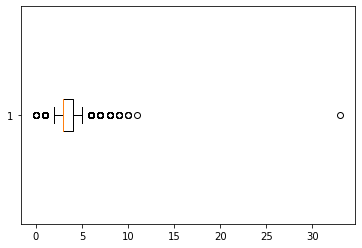

In [27]:
plt.boxplot(df['bedrooms'], vert = False)

In [28]:
Q1 = df['bedrooms'].quantile(0.25)
Q3 = df['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
print('Inter quartile range is:', IQR)

Inter quartile range is: 1.0


In [29]:
l_limit = Q1 - 1.5*IQR
u_limit = Q3 + 1.5*IQR
print('lower limit is:', l_limit)
print('upper limit is:', u_limit)

lower limit is: 1.5
upper limit is: 5.5


In [30]:
outliers = []
for x in df['bedrooms']:
    if ((x < l_limit) | (x > u_limit)):
        outliers.append(x)
print('outliers are:', outliers)
print(len(outliers))

outliers are: [1, 6, 6, 6, 1, 6, 1, 1, 6, 6, 7, 6, 1, 6, 6, 6, 6, 1, 0, 1, 1, 7, 1, 6, 6, 6, 6, 7, 6, 6, 6, 1, 1, 6, 1, 6, 6, 6, 6, 6, 1, 1, 8, 6, 6, 6, 1, 6, 6, 6, 1, 1, 1, 6, 1, 1, 1, 6, 6, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 1, 6, 6, 6, 6, 6, 1, 1, 1, 1, 6, 1, 0, 6, 1, 6, 1, 1, 1, 6, 1, 0, 1, 6, 6, 6, 1, 1, 6, 6, 1, 6, 7, 6, 6, 6, 1, 1, 1, 6, 6, 1, 1, 7, 8, 8, 1, 9, 6, 1, 6, 9, 6, 6, 6, 1, 1, 1, 6, 6, 6, 1, 6, 6, 6, 7, 7, 1, 7, 0, 1, 6, 1, 6, 6, 6, 1, 6, 6, 1, 6, 6, 6, 6, 6, 6, 1, 1, 1, 1, 1, 6, 6, 9, 1, 1, 1, 6, 8, 6, 6, 6, 6, 1, 6, 6, 6, 1, 1, 6, 6, 0, 1, 7, 6, 6, 6, 7, 6, 1, 6, 6, 1, 6, 1, 1, 6, 6, 6, 6, 6, 1, 1, 6, 6, 6, 6, 1, 1, 1, 6, 7, 1, 6, 1, 6, 1, 6, 1, 6, 6, 6, 1, 0, 0, 7, 1, 1, 9, 1, 1, 1, 7, 6, 6, 1, 11, 1, 1, 6, 1, 6, 1, 6, 8, 6, 6, 6, 1, 7, 6, 1, 6, 6, 1, 6, 6, 1, 8, 1, 6, 1, 1, 1, 6, 6, 6, 7, 6, 6, 7, 0, 6, 6, 6, 1, 1, 6, 0, 1, 6, 6, 1, 1, 6, 6, 1, 6, 7, 1, 1, 1, 6, 6, 7, 1, 8, 6, 6, 6, 6, 6, 6, 6, 1, 6, 1, 1, 6, 1, 1, 6, 1, 6, 6, 1, 1, 6, 6, 1, 6, 6, 6, 1, 

In [31]:
df_copy = df[(df['bedrooms'] > 1) & (df['bedrooms'] < 6)]
df_copy

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


{'whiskers': [<matplotlib.lines.Line2D at 0x2771c526f70>,
 'caps': [<matplotlib.lines.Line2D at 0x2771c314670>,
 'boxes': [<matplotlib.lines.Line2D at 0x2771c526c10>],
 'medians': [<matplotlib.lines.Line2D at 0x2771c314d30>],
 'fliers': [<matplotlib.lines.Line2D at 0x2771c31f070>],
 'means': []}

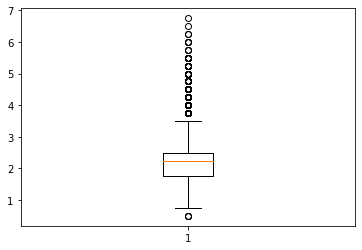

In [32]:
plt.boxplot(df_copy['bathrooms'], vert = True)

In [33]:
df_copy['bathrooms'].describe()

count    21067.000000
mean         2.108618
std          0.746090
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          6.750000
Name: bathrooms, dtype: float64

In [34]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [36]:
#dropping irrelevant features from the dataset
df = df.drop(['id', 'date', 'waterfront', 'view', 'sqft_basement', 'yr_renovated'], axis = 1)

In [37]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,1987,98074,47.6168,-122.045,1800,7503


In [38]:
df.shape

(21613, 15)

In [39]:
#removing outlieres using z-score in all dataset
df_copy = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] 
df_copy.shape

(20099, 15)

In [40]:
df.drop('price', axis = 1).corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
bedrooms,1.000000,0.515884,0.576671,0.031703,0.175429,0.028472,0.356967,0.477600,0.154178,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.515884,1.000000,0.754665,0.087740,0.500653,-0.124982,0.664983,0.685342,0.506019,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.576671,0.754665,1.000000,0.172826,0.353949,-0.058753,0.762704,0.876597,0.318049,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.031703,0.087740,0.172826,1.000000,-0.005201,-0.008958,0.113621,0.183512,0.053080,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.175429,0.500653,0.353949,-0.005201,1.000000,-0.263768,0.458183,0.523885,0.489319,-0.059121,0.049614,0.125419,0.279885,-0.011269
condition,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,1.000000,-0.144674,-0.158214,-0.361417,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.356967,0.664983,0.762704,0.113621,0.458183,-0.144674,1.000000,0.755923,0.446963,-0.184862,0.114084,0.198372,0.713202,0.119248
sqft_above,0.477600,0.685342,0.876597,0.183512,0.523885,-0.158214,0.755923,1.000000,0.423898,-0.261190,-0.000816,0.343803,0.731870,0.194050
yr_built,0.154178,0.506019,0.318049,0.053080,0.489319,-0.361417,0.446963,0.423898,1.000000,-0.346869,-0.148122,0.409356,0.326229,0.070958
zipcode,-0.152668,-0.203866,-0.199430,-0.129574,-0.059121,0.003026,-0.184862,-0.261190,-0.346869,1.000000,0.267048,-0.564072,-0.279033,-0.147221


In [41]:
# removing highly correlated features
df = df.drop(['sqft_above', 'sqft_lot15'], axis = 1) 